In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

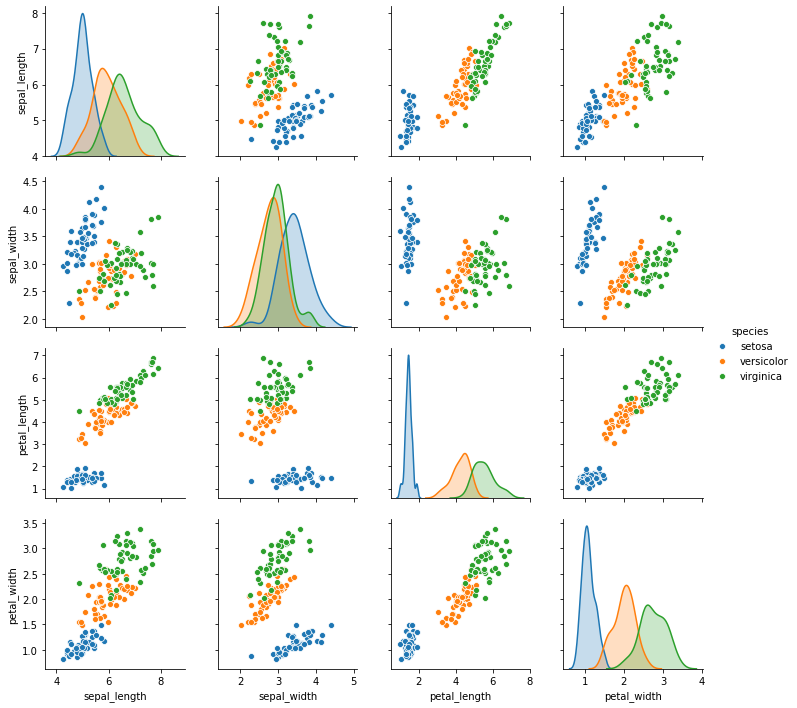

In [4]:
iris = pd.read_csv("iris_dataset.csv")
iris.columns = ["id","sepal_length","sepal_width","petal_length","petal_width","species"]
del iris["id"]

# Removing missing values
iris_dna = iris.dropna(axis=0, how='any')

# Exploratory analysis using seaborn pairplot
sns.pairplot(iris_dna,hue="species")
plt.show()

In [5]:
iris_setosa = iris_dna[iris_dna["species"] == "setosa"]
iris_virginica = iris_dna[iris_dna["species"] == "virginica"]
iris_versicolor = iris_dna[iris_dna["species"] == "versicolor"]

In [7]:
# dataset example
iris_dna.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.138728,3.470118,1.441015,1.094873,setosa
1,4.849873,3.034931,1.414931,0.968687,setosa
2,4.715843,3.239083,1.295309,1.006643,setosa
4,4.988744,3.645049,1.417527,1.122947,setosa
5,5.430821,3.884073,1.699534,1.370708,setosa


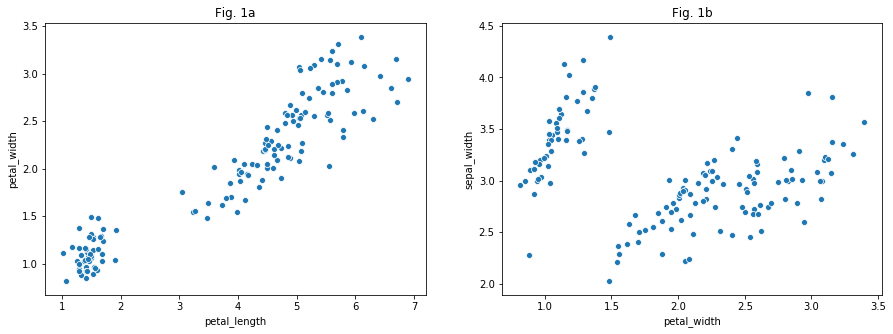

In [13]:
# Plotting the 2 diagrams on which we are going to calculate the correlation coefficient:
fig = plt.figure(figsize=(15,5))
fig.add_subplot(1,2,1)
plt.title("Fig. 1a")
sns.scatterplot(x="petal_length", y="petal_width", data=iris_dna)
fig.add_subplot(1,2,2)
plt.title("Fig. 1b")
sns.scatterplot(x="petal_width", y="sepal_width", data=iris_dna)
plt.show()

In [14]:
import scipy.stats as st

# Pearson correlation coefficient
print("Correlation coefficient(petal_length,petal_width) = ", st.pearsonr(iris_dna['petal_length'], iris_dna['petal_width'])[0])
print("Correlation coefficient(petal_width,sepal_width) = ", st.pearsonr(iris_dna['petal_width'], iris_dna['sepal_width'])[0])

Correlation coefficient(petal_length,petal_width) =  0.9418817573025173
Correlation coefficient(petal_width,sepal_width) =  -0.247971306157846


In [15]:
# The anticorrelation found (-0.25) is only appearent: we clearly see a complex distribution in Fig 2b which cannot be fitted using a straight line.

In [12]:
# Correlation coefficion per species:
print("Correlation coefficient(petal_width,sepal_width) iris_setosa = ", st.pearsonr(iris_setosa['petal_width'], iris_setosa['sepal_width'])[0])
print("")
print("Correlation coefficient(petal_width,sepal_width) iris_virginica = ", st.pearsonr(iris_virginica['petal_width'], iris_virginica['sepal_width'])[0])
print("")
print("Correlation coefficient(petal_width,sepal_width) iris_versicolor = ", st.pearsonr(iris_versicolor['petal_width'], iris_versicolor['sepal_width'])[0])

Correlation coefficient(petal_width,sepal_width) iris_setosa =  0.7531349595699939

Correlation coefficient(petal_width,sepal_width) iris_virginica =  0.6850773581335285

Correlation coefficient(petal_width,sepal_width) iris_versicolor =  0.8250525564073544


In [ ]:
# Correlation coefficients per species suggests that we have to split our dataset

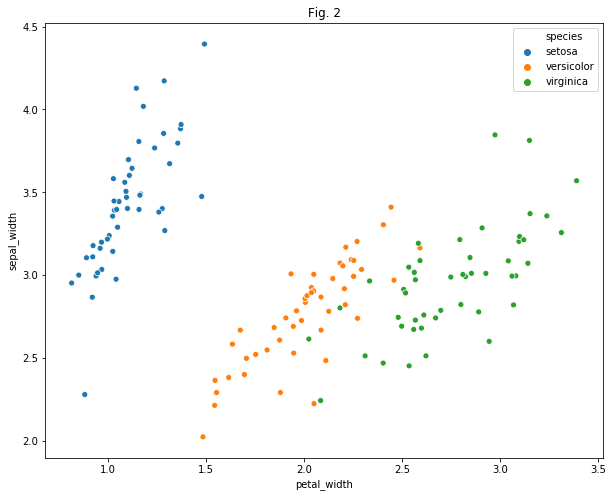

In [16]:
# Scatterplot of 'sepal_width' VS 'petal_wisdh' per species:
fig = plt.figure(figsize=(10,8))
plt.title("Fig. 2")
sns.scatterplot(x="petal_width", y="sepal_width", data=iris_dna, hue="species")
plt.show()

In [17]:
from sklearn.linear_model import LinearRegression

# data for the regression on iris_dna
data1 = iris_dna['petal_length'][:, np.newaxis] # LinearRegression.fit() expects a 2D array as x-coordinate
target1 = iris_dna['petal_width']
# theta1 contains the parameters (a1,b1) for the first regression
regr1 = LinearRegression().fit(data1, target1)
theta1 = regr1.coef_[0], regr1.intercept_
print('a1, b1 (iris) = {}'.format(theta1))

# iris_setosa
data2 = iris_setosa['petal_width'][:, np.newaxis]
target2 = iris_setosa['sepal_width']
regr2 = LinearRegression().fit(data2, target2)
theta2 = regr2.coef_[0], regr2.intercept_
print('a2, b2 (setosa) = {}'.format(theta2))

# iris_virginica
data3 = iris_virginica['petal_width'][:, np.newaxis]
target3 = iris_virginica['sepal_width']
regr3 = LinearRegression().fit(data3, target3)
theta3 = regr3.coef_[0], regr3.intercept_
print('a3, b3 (virginica) = {}'.format(theta3))

# iris_versicolor
data4 = iris_versicolor['petal_width'][:, np.newaxis]
target4 = iris_versicolor['sepal_width']
regr4 = LinearRegression().fit(data4, target4)
theta4 = regr4.coef_[0], regr4.intercept_
print('a4, b4 (versicolor) = {}'.format(theta4))

a1, b1 (iris) = (0.3859942100308645, 0.5092683365300006)
a2, b2 (setosa) = (1.7875014940283411, 1.4593274917352772)
a3, b3 (virginica) = (0.699250595971297, 1.0377429413261876)
a4, b4 (versicolor) = (0.9735704312621849, 0.8094893720788439)


In [219]:
# Si vous n'avez pas installé la librerie Scikit-learn, le bloc suivant calcule de nouveau le parametres
# a, b pour les quatre regressions:
import statsmodels.api as sm

Y1 = iris_dna['petal_width']
X1 = iris_dna[['petal_length']]
X1 = X1.copy()
X1['intercept'] = 1.
result1 = sm.OLS(Y1, X1).fit() 
a1,b1 = result1.params['petal_length'],result1.params['intercept']
print('a1, b1 (iris) = {}, {}'.format(a1,b1))

Y2 = iris_setosa['sepal_width']
X2 = iris_setosa[['petal_width']]
X2 = X2.copy()
X2['intercept'] = 1.
result2 = sm.OLS(Y2, X2).fit() 
a2,b2 = result2.params['petal_width'],result2.params['intercept']
print('a2, b2 (setosa) = {}, {}'.format(a2,b2))

Y3 = iris_virginica['sepal_width']
X3 = iris_virginica[['petal_width']]
X3 = X3.copy()
X3['intercept'] = 1.
result3 = sm.OLS(Y3, X3).fit() 
a3,b3 = result3.params['petal_width'],result3.params['intercept']
print('a3, b3 (virginica) = {}, {}'.format(a3,b3))

Y4 = iris_versicolor['sepal_width']
X4 = iris_versicolor[['petal_width']]
X4 = X4.copy()
X4['intercept'] = 1.
result4 = sm.OLS(Y4, X4).fit() 
a4,b4 = result4.params['petal_width'],result4.params['intercept']
print('a4, b4 (versicolor) = {}, {}'.format(a4,b4))

a1, b1 (iris) = 0.38599421003086476, 0.50926833653
a2, b2 (setosa) = 1.7875014940283402, 1.4593274917352779
a3, b3 (virginica) = 0.6992505959712972, 1.0377429413261894
a4, b4 (versicolor) = 0.9735704312621852, 0.8094893720788432


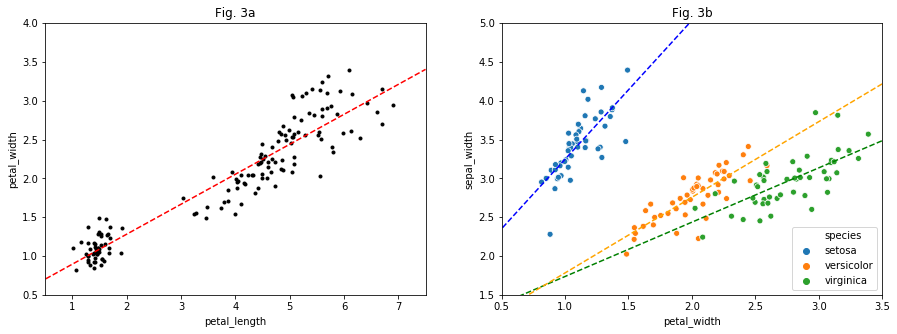

In [19]:
# Showing the 2 plot containing the 4 fits performed above (with underlying data).
# On the left petal_width VS petal_length for the whole dataset.
# On the right sepal_width VS petal_width per species.
fig = plt.figure(figsize=(15,5))
fig.add_subplot(1,2,1)
plt.ylabel("petal_width")
plt.xlabel("petal_length")
plt.title("Fig. 3a")
plt.plot(iris_dna['petal_length'], iris_dna['petal_width'], 'ko', markersize=3)
plt.plot([0,7.5], [theta1[1],theta1[1] + 7.5 * theta1[0]], linestyle='--', c='red')
plt.xlim(0.5, 7.5)
plt.ylim(0.5, 4.0)
fig.add_subplot(1,2,2)
plt.title("Fig. 3b")
sns.scatterplot(x="petal_width", y="sepal_width", data=iris_dna, hue="species")
plt.plot([0,3.5], [theta2[1],theta2[1] + 3.5 * theta2[0]], linestyle='--', c='blue')
plt.plot([0,3.5], [theta3[1],theta3[1] + 3.5 * theta3[0]], linestyle='--', c='green')
plt.plot([0,3.5], [theta4[1],theta4[1] + 3.5 * theta4[0]], linestyle='--', c='orange')
plt.xlim(0.5, 3.5)
plt.ylim(1.5, 5.0)
plt.show()